In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Excerise 0: plot the Lorenz curve and calculate Gini index for the example dataframe

        Pais   PBI
0    Senegal    20
1  Argentina   180
2      Chile   800
3      Japon  2300
4      Suiza  4200


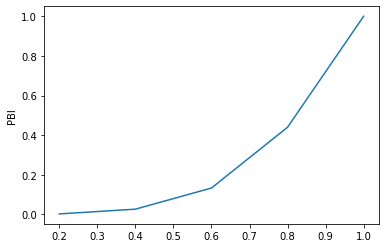

In [51]:
#Plot Lorenz Curve (x = fraction of accumulated population, y = fraction of accumulated wealth)
data = [["Senegal",20],["Argentina",180],["Chile",800],["Japon",2300],["Suiza",4200]]
df = pd.DataFrame(data, columns=["Pais","PBI"])
print(df.head(5))
sns.lineplot(x=(df.index+1)/5,y=df["PBI"].cumsum()/df["PBI"].sum());

In [50]:
# Calculate Gini index
b1 = pd.Series([0]).append(df["PBI"].cumsum()/df["PBI"].sum(),ignore_index=True)[:5]
b2 = df["PBI"].cumsum()/df["PBI"].sum()
print(b2)
a = pd.Series([0.2,0.2,0.2,0.2,0.2])
print(1-2*sum(0.5*a*(b1+b2)))

0    0.002667
1    0.026667
2    0.133333
3    0.440000
4    1.000000
Name: PBI, dtype: float64
0.5589333333333333


#### Exercise 1: create function that, given a year and a dataframe showing wealth per country, generates lorenz curve along with reference x=y lineplot

In [53]:
# Load csv
pbi = pd.read_csv("./ep2020inv-pbi.csv",index_col=0)
#pbi=pd.read_csv("http://bit.do/ep2020inv-pbi",index_col=0)
pbi.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,603,603,603,603,603,603,603,603,603,603,...,2550,2600,2660,2710,2770,2820,2880,2940,3000,3060
Albania,667,667,667,667,667,668,668,668,668,668,...,19400,19800,20200,20600,21000,21500,21900,22300,22800,23300
Algeria,715,716,717,718,719,720,721,722,723,724,...,14300,14600,14900,15200,15500,15800,16100,16500,16800,17100
Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,1220,...,73600,75100,76700,78300,79800,81500,83100,84800,86500,88300
Angola,618,620,623,626,628,631,634,637,640,642,...,6110,6230,6350,6480,6610,6740,6880,7020,7160,7310


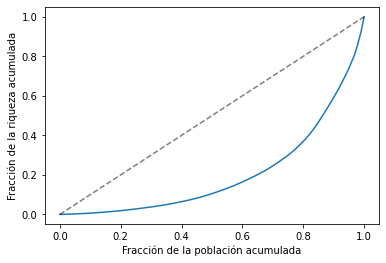

In [82]:
def graficar_curva_lorenz(pbi, anio):
    values = pbi.sort_values(anio)[[anio]]
    n = values.count()[0]
    population_frac = list(range(0,n+1))/n
    wealth_frac = pd.Series([0]).append(values[anio].cumsum()/values[anio].sum())
    sns.lineplot(x=population_frac,y=wealth_frac);
    plt.plot(population_frac,population_frac,linestyle='--',color=(0,0,0,0.5));
    plt.xlabel("Fracción de la población acumulada");
    plt.ylabel("Fracción de la riqueza acumulada");


graficar_curva_lorenz(pbi,'2000')

In [155]:
def calcular_gini(df,anio):
    values = df.sort_values(anio)[[anio]]
    n = values.count()[0]
    population_frac = list(range(0,n+1))/n
    b1 = pd.Series([0]).append(values[anio].cumsum()/values[anio].sum(),ignore_index=True)[:n]
    b2 = (values[anio].cumsum()/values[anio].sum()).reset_index(drop=True)
    a = pd.Series([1/n]*n)
    return (1-2*sum(0.5*a*(b1+b2)))

calcular_gini(pbi,'2000')

0.5914265079150336

#### Excercise 3: graph the evolution of the Gini index over the last 200 years

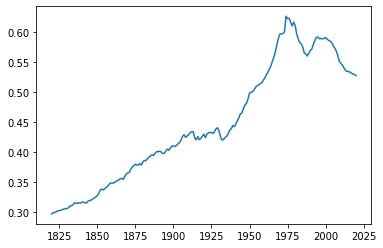

In [158]:
evol_gini = []
for anio in range(1820,2021):
    evol_gini.append(calcular_gini(pbi,str(anio)))
sns.lineplot(x=list(range(1820,2021)), y=evol_gini)

In [102]:
index_max = max(range(len(evol_gini)), key=evol_gini.__getitem__)
print("La desigualdad global fue máxima en",list(range(1820,2020))[index_max])

La desigualdad global fue máxima en 1974


#### Excercise 4: graph the evolution of the global Gini index from 18000 to 2014

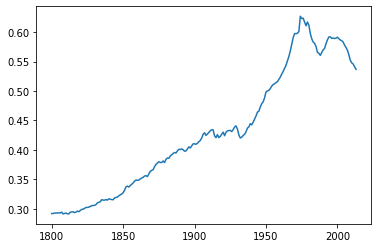

In [163]:
evol_gini = []
for anio in range(1800,2014):
    evol_gini.append(calcular_gini(pbi,str(anio)))
sns.lineplot(x=list(range(1800,2014)), y=evol_gini)

#### Excercise 5: graph the Gini index for each continent

Copio la funcion para agregar una columna región de la parte pasada

In [106]:
geo=pd.read_csv("./ep2020inv-geo.csv",index_col='name')
#geo=pd.read_csv("http://bit.do/ep2020inv-geo",index_col='name')

In [115]:
#Precond: tiene países en su índice
def obtener_region(X):
    try:
        return geo.loc[X.name,'four_regions']
    except:
        print("[ERROR] El país",X.name,"no tiene región")
        return np.nan

#Precond: tiene países en su índice
def agregar_region(df):
    df['region'] = df.apply(obtener_region,axis=1)

In [ ]:
fig = plt.figure(figsize=(8,6))
evol_gini = []
for anio in range(1800,2014):
    evol_gini.append(calcular_gini(pbi,str(anio)))
sns.lineplot(x=list(range(1800,2014)), y=evol_gini,hue=pbi['hue'])

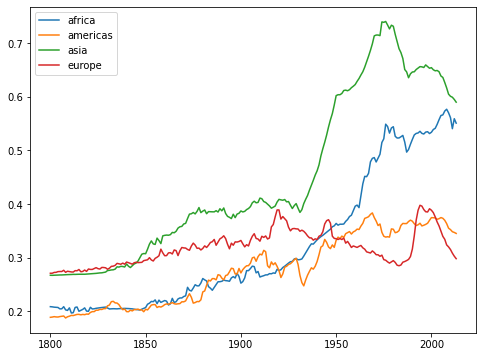

In [161]:
fig = plt.figure(figsize=(8,6))
for cont in ['africa','americas','asia','europe']:
    evol_gini = []
    for anio in range(1800,2014):
        filtro_continente = pbi['region']==cont
        evol_gini.append(calcular_gini(pbi[filtro_continente],str(anio)))
    plt.plot(list(range(1800,2014)), evol_gini, label=cont)
plt.legend(['africa','americas','asia','europe'])